In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import fma.utils
from keras.models import load_model
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.
/Users/diegoaguado/anaconda2/envs/music/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from utils.evaluation import get_full_song_predictions
from utils.plotting import plot_confusion_matrix
from build_spectrograms import build_spectrograms

Read 8000 files


/Users/diegoaguado/Desktop/Music_Project/Music-Classification/fma/utils.py:213: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


# How to use this notebook.
The following notebook evaluates the 3 different datasets and plots the corresponding confusion matrix.
To evaluate your model, select the parameters to build the spectrograms with the shapto your model and train your model and change the model path

In [3]:
windows_number = 10
hop_length = 350

small_dataset_spectrograms = build_spectrograms(windows_number, hop_length)


 Found spectrograms for hop_length 350 and windows 10


In [15]:
model_path = 'saved_models/hop_length_350.h5'

In [4]:
my_model = load_model(model_path)

In [5]:
train_sequences, y_train_binary_sequences = small_dataset_spectrograms['train']                                                                    
val_sequences, y_val_binary_sequences = small_dataset_spectrograms['val']                                                                          
test_sequences, y_test_binary_sequences = small_dataset_spectrograms['test']                                                                       
del small_dataset_spectrograms

# Train dataset evaluation
## Evaluation of all windows

In [6]:
loss, accuracy = my_model.evaluate(train_sequences,                                                                                         
                                   y_train_binary_sequences)                                                                                                                                                                                               

print("\nLoss: {} ; Acc: {} on windowed test dataset ".format(loss, accuracy))

31936/31950 [============================>.] - ETA: 0s
Loss: 0.508937070578327 ; Acc: 0.8070109546277818 on windowed test dataset 


## Evaluation averaging among windows

In [7]:
window_probabilities = my_model.predict(train_sequences)
y_train, predictions, accuracy = get_full_song_predictions(window_probabilities, y_train_binary_sequences)


Accuracy for full songs is 0.8597809076682316


Normalized confusion matrix
[[ 0.77847309  0.08385482  0.11639549  0.0212766 ]
 [ 0.0238394   0.95608532  0.01254705  0.00752823]
 [ 0.0575      0.02125     0.84125     0.08      ]
 [ 0.00876095  0.02252816  0.10513141  0.86357947]]


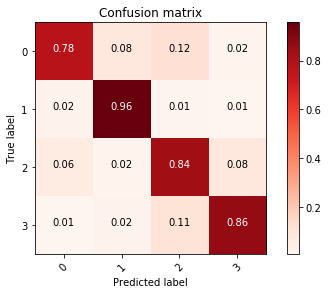

In [8]:
train_confmatrix = confusion_matrix((y_train), predictions)
plot_confusion_matrix(train_confmatrix, range(4), normalize=True)

# Validation dataset evaluation
## Evaluation of all windows

In [9]:
loss, accuracy = my_model.evaluate(val_sequences,                                                                                         
                                   y_val_binary_sequences)                                                                                                                                                                                               
       
print("\nLoss: {} ; Acc: {} on windowed test dataset ".format(loss, accuracy))

4000/4000 [==============================] - 7s     

Loss: 0.9592182969003916 ; Acc: 0.6805 on windowed test dataset 


## Evaluation averaging among windows

In [10]:
window_probabilities = my_model.predict(val_sequences)
y_val, predictions, accuracy = get_full_song_predictions(window_probabilities, y_val_binary_sequences)


Accuracy for full songs is 0.7175


Normalized confusion matrix
[[ 0.59  0.21  0.16  0.04]
 [ 0.16  0.81  0.01  0.02]
 [ 0.15  0.04  0.65  0.16]
 [ 0.06  0.08  0.04  0.82]]


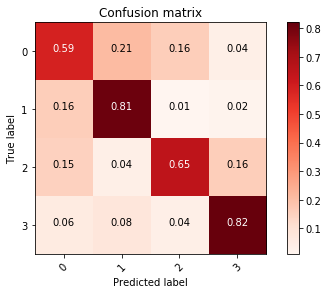

In [11]:
val_confmatrix = confusion_matrix((y_val), predictions)
plot_confusion_matrix(val_confmatrix, range(4), normalize=True)

# Test dataset evaluation
## Evaluation of all windows

In [12]:
loss, accuracy = my_model.evaluate(test_sequences,                                                                                         
                                   y_test_binary_sequences)                                                                                                                                                                                               
       
print("\nLoss: {} ; Acc: {} on windowed test dataset ".format(loss, accuracy))                                                                     


4000/4000 [==============================] - 5s     

Loss: 0.9775582729838789 ; Acc: 0.67625 on windowed test dataset 


## Evaluation averaging among windows

In [13]:
predicted_probabilities = my_model.predict(test_sequences)
y_test, predictions, accuracy = get_full_song_predictions(predicted_probabilities, y_test_binary_sequences)


Accuracy for full songs is 0.7275


Normalized confusion matrix
[[ 0.66  0.19  0.09  0.06]
 [ 0.05  0.92  0.01  0.02]
 [ 0.13  0.07  0.67  0.13]
 [ 0.05  0.13  0.16  0.66]]


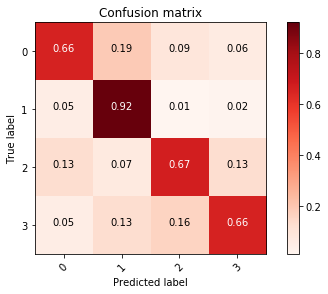

In [14]:
test_confmatrix = confusion_matrix((y_test), predictions)
plot_confusion_matrix(test_confmatrix, range(4), normalize=True)